In [1]:
import tldextract
import pandas as pd
import ipaddress as ip
from os.path import splitext
from urllib.parse import urlparse
from sklearn.metrics import confusion_matrix, classification_report

# *Training Url set*

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rlilojr/Detecting-Malicious-URL-Machine-Learning/master/dataset.csv")
df.groupby('label').count()

,url
label,
0,1000000
1,56937


## Tranining Urls and Model Feeding Set

In [3]:
data_test=df.head(120000)
data_test.groupby('label').count()

,url
label,
0,63063
1,56937


In [4]:
# Few suspicious TLD and Words
Suspicious_TLD=['zip','cricket','link','work','party','gq','kim','country','science','tk','surf','cn','ga','cf','ml','tokyo','top']

# Suspicious Domains
Suspicious_Domain=['luckytime.co.kr','mattfoll.eu.interia.pl','trafficholder.com','dl.baixaki.com.br','bembed.redtube.comr','tags.expo9.exponential.com','deepspacer.com','funad.co.kr','trafficconverter.biz']

# **Defining Function**

In [5]:
def dotCount(url):
    return url.count('.')

In [6]:
def delimCount(url):
    delim=[';','_','?','=','&']
    for item in url:
        if item in delim:
            count +=1
    return count

In [7]:
def ifHyphen(url):
    return url.count('-')

In [8]:
def ifAt(url):
    return url.count('@')

In [9]:
def ifDoubleSlash(url):
    return url.count('//')

In [10]:
def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0

In [11]:
def countSubDir(url):
    return url.count('/')

In [12]:
def getExtension(url):
    """Return the file Extension from the URL such as '.html','.php',etc"""
    
    root, ext = splitext(url)
    return ext

In [13]:
def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))

In [14]:
def queriesCount(query):
    if not query:
        return 0 
    else:
        return len(query.split('&'))

**Function Defination Done!**

# **Function Initialisation**

In [15]:
def getFeatures(url, label):
    result = []
    url = str(url)
    
    # Adding inputs to the 'result' list
    result.append(url)
    
    path = urlparse(url)
    ext = tldextract.extract(url)

    result.append(dotCount(ext.subdomain))

    result.append(ifHyphen(path.netloc))

    result.append(len(url))

    result.append(ifAt(path.netloc))

    result.append(ifDoubleSlash(path.path))

    result.append(countSubDir(path.path))

    result.append(countSubDomain(ext.subdomain))

    result.append(len(path.netloc))

    result.append(len(path.query))

    result.append(isip(ext.domain))
    
    result.append(1 if ext.suffix in Suspicious_TLD else 0)

    result.append(1 if '.'.join(ext[1:]) in Suspicious_Domain else 0)

    result.append(str(label))
    return result



In [16]:
featureSet = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))

In [17]:
for i in range(len(data_test)):
    features = getFeatures(data_test['url'].loc[i], data_test['label'].loc[i])
    featureSet.loc[i] = features

In [18]:
featureSet

,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,presence of Suspicious_TLD,presence of suspicious domain,label
0,http://br-ofertasimperdiveis.epizy.com/produto...,0,1,186,0,0,1,1,31,135,0,0,0,1
1,https://semana-da-oferta.com/produtos.php?id=5...,0,2,58,0,0,1,0,20,16,0,0,0,1
2,https://scrid-apps-creacust-sslhide90766752024...,0,4,72,0,0,2,1,53,0,0,0,0,1
3,http://my-softbank-security.com/wap_login.htm,0,2,45,0,0,1,0,24,0,0,0,0,1
4,http://www.my-softbank-security.com/wap_login.htm,0,2,49,0,0,1,1,28,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,schule.at,0,0,9,0,0,0,0,0,0,0,0,0,0
119996,fadm.gov.ru,0,0,11,0,0,0,1,0,0,0,0,0,0
119997,telkomsel.com,0,0,13,0,0,0,0,0,0,0,0,0,0
119998,fibaro.com,0,0,10,0,0,0,0,0,0,0,0,0,0


### **DataSet Processing is Done!**

# **Data Visualization**

In [19]:
# importing Visualization packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from __future__ import division


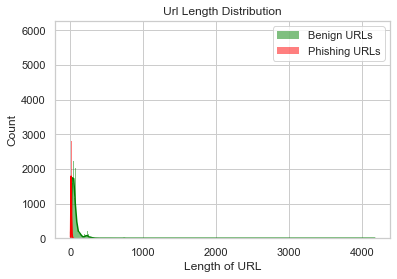

In [20]:
# Checking the length of the urls on both sides 

sns.set(style="whitegrid")
sns.histplot(featureSet[featureSet['label']=='1']['len of url'], color='green',label='Benign URLs',kde=True)
sns.histplot(featureSet[featureSet['label']=='0']['len of url'], color='red',label='Phishing URLs',kde=True)
plt.xlabel('Length of URL')
plt.legend(loc='upper right')
plt.legend( loc='upper right')
plt.xlabel('Length of URL')

plt.title('Url Length Distribution')
plt.show();

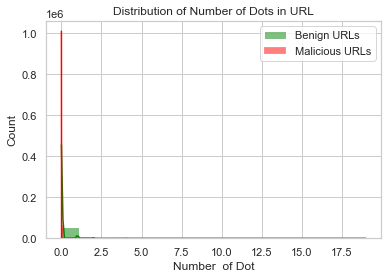

In [21]:
# Counting the number of dots on both sides

sns.set(style="whitegrid")
sns.histplot(featureSet[featureSet['label']=='1']['no of dots'], color='green',label='Benign URLs',kde=True)
sns.histplot(featureSet[featureSet['label']=='0']['no of dots'], color='red',label='Malicious URLs',kde=True)
plt.xlabel('Number of Dot')
plt.legend(loc='upper right')
plt.legend( loc='upper right')
plt.xlabel('Number  of Dot')

plt.title('Distribution of Number of Dots in URL')
plt.show();

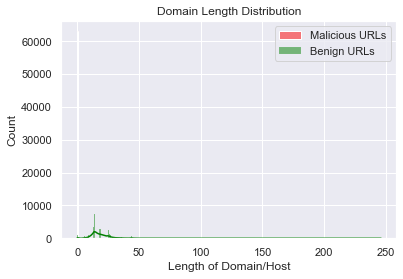

In [22]:
sns.set(style="darkgrid")
sns.histplot(featureSet[featureSet['label']=='0']['len of domain'],color='red',label='Malicious URLs',kde=True)
sns.histplot(featureSet[featureSet['label']=='1']['len of domain'],color='green',label='Benign URLs',kde=True)
plt.title('Domain Length Distribution')
plt.legend(loc='upper right')
plt.legend( loc='upper right')
plt.xlabel('Length of Domain/Host')
plt.show();

# *Report Generator*

In [23]:
def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Reds', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show();
  

print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###



## *Applying Models of the processed data*

In [24]:
import sklearn.ensemble as ek
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [25]:
featureSet.groupby(featureSet['label']).size()

label
0    63063
1    56937
dtype: int64

In [26]:
X = featureSet.drop(['url','label'],axis=1).values
y = featureSet['label'].values

In [27]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":LogisticRegression(max_iter=1000)   
}

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=50)

In [29]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print (f"{algo} : {score}")
    results[algo] = score
    
print("*-"*10)
winner = max(results, key=results.get)
print(f"{winner}")

DecisionTree : 0.992375
RandomForest : 0.9923333333333333
Adaboost : 0.991625
GradientBoosting : 0.9924583333333333
GNB : 0.9917916666666666
LogisticRegression : 0.9924583333333333
*-*-*-*-*-*-*-*-*-*-
GradientBoosting


#### Testing the Accuray of My model

GradientBoostingClassifier(n_estimators=50)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     63063
           1       1.00      0.99      0.99     56937

    accuracy                           0.99    120000
   macro avg       0.99      0.99      0.99    120000
weighted avg       0.99      0.99      0.99    120000



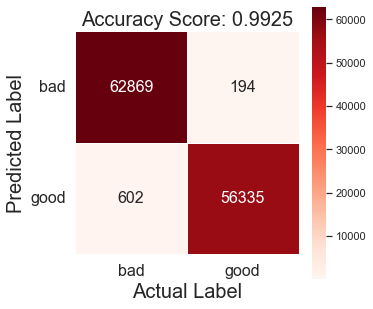

In [30]:
clf = model[winner]
print(clf)
res = clf.predict(X)
mt = confusion_matrix(y,res)
report = classification_report(y,res)
generate_report(mt,score,report)

In [34]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at','presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD','presence of suspicious domain','label'))
results = getFeatures('www..foofle.mo','0')
result.loc[0] = results
print(results)
result = result.drop(['url','label'],axis=1).values
print(clf.predict(result))

['www..foofle.mo', 1, 0, 14, 0, 0, 0, 2, 0, 0, 0, 0, 0, '0']
['0']


In [32]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))

results = getFeatures('https://www.twitter.com/', '0')
result.loc[0] = results
print(results)
result = result.drop(['url','label'],axis=1).values
print(clf.predict(result))

['https://www.twitter.com/', 0, 0, 24, 0, 0, 1, 1, 15, 0, 0, 0, 0, '0']
['1']


Testing with Live Input